In [245]:
import pandas as pd
import numpy as np

In [246]:
%matplotlib inline

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

import cufflinks as cf

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')

----------

## Bauprojekte, Bausumme und Rauminhalt im Bau von 2008 bis 2018

In [248]:
# looking at cleaned data
df_im_bau = pd.read_excel('Daten/Bauprojekte/01_Bauprojekte_im_Bau_clean.xlsx')
df_im_bau.head()

,Jahr,Projekte – Alle Projekte,Projekte – Wohnen Neubau,Projekte – Wohnen Umbau,Projekte – Nichtwohnen Neubau,Projekte – Nichtwohnen Umbau,Bausumme – Alle Projekte,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau,Rauminhalt – Alle Projekte,Rauminhalt – Wohnen Neubau,Rauminhalt – Nichtwohnen Neubau
1,2008,110,29,28,23,30,3943891,1909389,417292,938757,678453,4124342,2853327,1271015
2,2009,106,25,31,25,25,5539764,2128477,363247,2216943,831097,5580259,2929807,2650452
3,2010,106,25,31,21,29,6600861,2580388,511766,2506486,1002221,6289239,3469382,2819857
4,2011,113,28,33,22,30,6031190,2145180,535430,2481579,869001,5646116,3024016,2622100
5,2012,108,27,33,20,28,5277020,1997692,527759,2098194,653375,4963511,2739109,2224402


------

## Rauminhalt aller Bauprojekte im Bau


In [249]:
# selecting [rows, columns]
df_bauprojekte_rauminhalt = df_im_bau.iloc[:, [0,12,13]]
df_bauprojekte_rauminhalt

,Jahr,Rauminhalt – Wohnen Neubau,Rauminhalt – Nichtwohnen Neubau
1,2008,2853327,1271015
2,2009,2929807,2650452
3,2010,3469382,2819857
4,2011,3024016,2622100
5,2012,2739109,2224402
6,2013,3484411,2153145
7,2014,4533524,2124121
8,2015,3705164,2116599
9,2016,3424393,2268287
10,2017,3618540,2252621


Text(0, 0.5, 'm3')

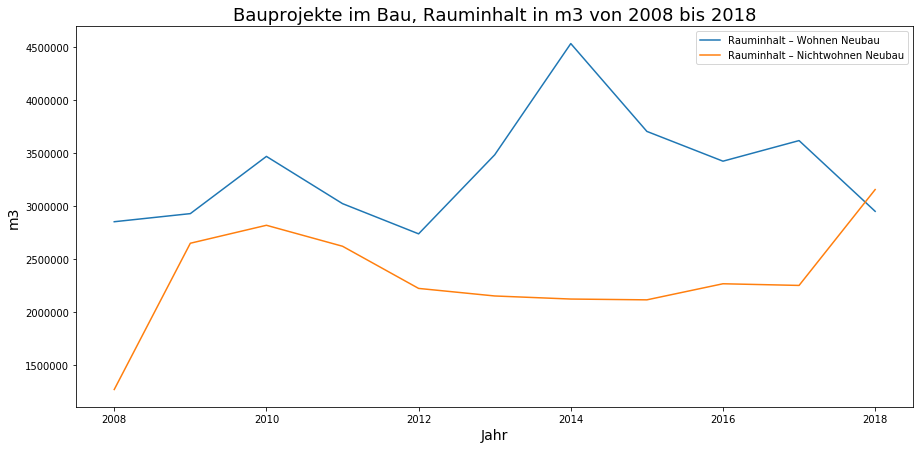

In [253]:
# setting index to 'Jahr' for a quick look with matplotlib
df_bauprojekte_rauminhalt_mtplt = df_bauprojekte_rauminhalt.set_index('Jahr')

df_bauprojekte_rauminhalt_mtplt.plot(kind='line', figsize=(15,7))
plt.title('Bauprojekte im Bau, Rauminhalt in m3 von 2008 bis 2018', {'fontsize': 18})
plt.xlabel('Jahr', {'fontsize': 14})
plt.ylabel('m3', {'fontsize': 14})

In [255]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_bauprojekte_rauminhalt_mtplt.to_excel('Daten/Plotly/Bauprojekte/04-02_Bauprojekte_im_Bau_Rauminhalt_2008-2018.xlsx')

--------------

### Bauprojekte im Bau, Rauminhalt im Jahr 2018

In [228]:
# selecting [rows, columns]
df_bauprojekte_rauminhalt_2018 = df_im_bau.iloc[[10], [0,12,13]]
df_bauprojekte_rauminhalt_2018

,Jahr,Rauminhalt – Wohnen Neubau,Rauminhalt – Nichtwohnen Neubau
11,2018,2951488,3156659


In [229]:
# ploting with Plotly
# color_palette = ['#2884B2', '#51ADFF', '#7BC1E7', '#B21310', '#FF6839']

trace1 = go.Bar(
    x=df_bauprojekte_rauminhalt_2018['Jahr'],
    y=df_bauprojekte_rauminhalt_2018['Rauminhalt – Wohnen Neubau'], 
    name="Wohnen Neubau",
    marker=dict(color='#FF6839')
)
trace2 = go.Bar(
    x=df_bauprojekte_rauminhalt_2018['Jahr'],
    y=df_bauprojekte_rauminhalt_2018['Rauminhalt – Nichtwohnen Neubau'], 
    name="Wohnen Umbau",
    marker=dict(color='#B21310')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Bauprojekte im Bau, Rauminhalt in m3 im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='m3',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [230]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_bauprojekte_rauminhalt_2018.to_excel('Daten/Plotly/Bauprojekte/04-01_Bauprojekte_im_Bau_Rauminhalt_2018.xlsx')

------------

## Bausumme aller Projekte im Bau


... es folgt ein Konvertierung der Zahlen zur besseren Lesbarkeit
* 3943891 (in 1000 Fr.) = 3.943891 Milliarden Franken


In [231]:
# selecting [rows, columns]
df_bausumme = df_im_bau.iloc[:, [0,6,7,8,9,10]]
df_bausumme.head()

,Jahr,Bausumme – Alle Projekte,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
1,2008,3943891,1909389,417292,938757,678453
2,2009,5539764,2128477,363247,2216943,831097
3,2010,6600861,2580388,511766,2506486,1002221
4,2011,6031190,2145180,535430,2481579,869001
5,2012,5277020,1997692,527759,2098194,653375


In [232]:
# setting index to column 'Jahr' for following conversion to "Milliarden mit Nachkommastellen"
df_bausumme = df_bausumme.set_index('Jahr')
df_bausumme.head()

,Bausumme – Alle Projekte,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
Jahr,,,,,
2008,3943891,1909389,417292,938757,678453
2009,5539764,2128477,363247,2216943,831097
2010,6600861,2580388,511766,2506486,1002221
2011,6031190,2145180,535430,2481579,869001
2012,5277020,1997692,527759,2098194,653375


In [233]:
# conversion of data to "Milliarden mit Nachkommastellen"
df_bausumme = df_bausumme.apply(lambda x: x/1000000)
df_bausumme.head()

,Bausumme – Alle Projekte,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
Jahr,,,,,
2008,3.943891,1.909389,0.417292,0.938757,0.678453
2009,5.539764,2.128477,0.363247,2.216943,0.831097
2010,6.600861,2.580388,0.511766,2.506486,1.002221
2011,6.031190,2.145180,0.535430,2.481579,0.869001
2012,5.277020,1.997692,0.527759,2.098194,0.653375


In [234]:
# looking at type of data
df_bausumme.dtypes

Bausumme – Alle Projekte         float64
Bausumme – Wohnen Neubau         float64
Bausumme – Wohnen Umbau          float64
Bausumme – Nichtwohnen Neubau    float64
Bausumme – Nichtwohnen Umbau     float64
dtype: object

In [235]:
# reseting index to default
df_bausumme.reset_index(inplace=True)
df_bausumme.head()

,Jahr,Bausumme – Alle Projekte,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
0,2008,3.943891,1.909389,0.417292,0.938757,0.678453
1,2009,5.539764,2.128477,0.363247,2.216943,0.831097
2,2010,6.600861,2.580388,0.511766,2.506486,1.002221
3,2011,6.031190,2.145180,0.535430,2.481579,0.869001
4,2012,5.277020,1.997692,0.527759,2.098194,0.653375


In [236]:
# data type is ok
df_bausumme.dtypes

Jahr                               int64
Bausumme – Alle Projekte         float64
Bausumme – Wohnen Neubau         float64
Bausumme – Wohnen Umbau          float64
Bausumme – Nichtwohnen Neubau    float64
Bausumme – Nichtwohnen Umbau     float64
dtype: object

---------

### Bausumme aller Projekte im Bau von 2008 bis 2018

In [237]:
# Bausumme aller Projekte von 2008 bis 2018
df_bausumme_alle = df_bausumme.iloc[:, [0,1]]
df_bausumme_alle

,Jahr,Bausumme – Alle Projekte
0,2008,3.943891
1,2009,5.539764
2,2010,6.600861
3,2011,6.031190
4,2012,5.277020
5,2013,6.451551
6,2014,7.268512
7,2015,6.496121
8,2016,6.862720
9,2017,7.142467


Text(0, 0.5, 'Milliarden Franken')

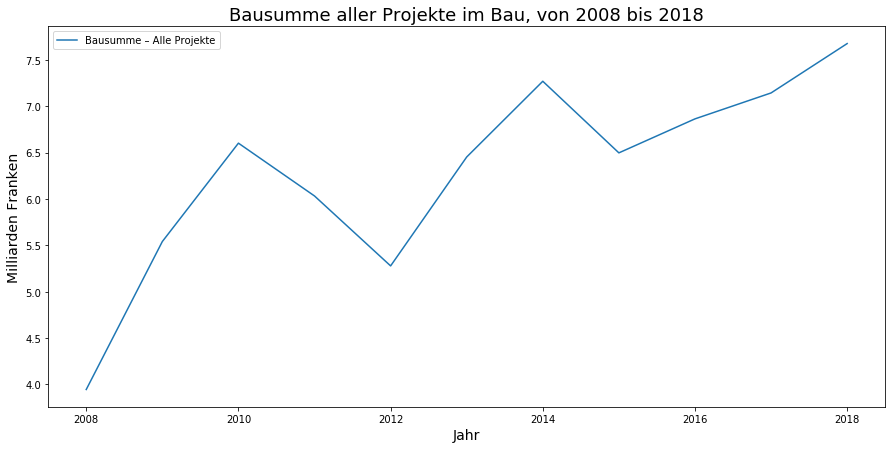

In [238]:
# having a quick look with matplotlib
df_bausumme_alle.plot(x='Jahr', y='Bausumme – Alle Projekte', figsize=(15,7))
plt.title('Bausumme aller Projekte im Bau, von 2008 bis 2018', {'fontsize': 18})
plt.xlabel('Jahr', {'fontsize': 14})
plt.ylabel('Milliarden Franken', {'fontsize': 14})

---------

### Bausumme der Projekte im Bau nach Art von 2008 bis 2018

In [239]:
# # selecting [rows, columns]
df_bausumme_0818 = df_bausumme.iloc[:, [0,2,3,4,5]]
df_bausumme_0818

,Jahr,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
0,2008,1.909389,0.417292,0.938757,0.678453
1,2009,2.128477,0.363247,2.216943,0.831097
2,2010,2.580388,0.511766,2.506486,1.002221
3,2011,2.145180,0.535430,2.481579,0.869001
4,2012,1.997692,0.527759,2.098194,0.653375
5,2013,2.499811,0.541902,2.254465,1.155373
6,2014,2.792521,0.471165,2.344397,1.660429
7,2015,2.501008,0.665223,2.192560,1.137330
8,2016,2.628874,0.471349,2.299377,1.463120
9,2017,2.744443,0.413530,2.215230,1.769264


Text(0, 0.5, 'Milliarden Franken')

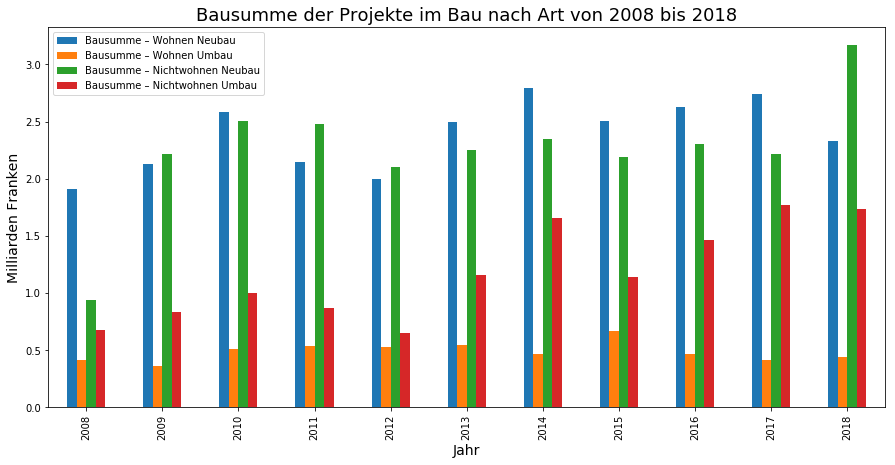

In [252]:
# setting index to 'Jahr' for a quick look with matplotlib
df_bausumme_0818 = df_bausumme_0817.set_index('Jahr')
df_bausumme_0818.plot(kind='bar', figsize=(15,7))
plt.title('Bausumme der Projekte im Bau nach Art von 2008 bis 2018', {'fontsize': 18})
plt.xlabel('Jahr', {'fontsize': 14})
plt.ylabel('Milliarden Franken', {'fontsize': 14})

------------

### Bausumme der Projekte im Bau im Jahr 2018

In [241]:
# # selecting [rows, columns]
df_bausumme_2018 = df_bausumme.iloc[[10], [0,2,3,4,5]]
df_bausumme_2018

,Jahr,Bausumme – Wohnen Neubau,Bausumme – Wohnen Umbau,Bausumme – Nichtwohnen Neubau,Bausumme – Nichtwohnen Umbau
10,2018,2.3324,0.441498,3.168847,1.732117


-------

### Bausumme der Neubauprojekte im Bau im Jahr 2018

In [242]:
# ploting with Plotly
# color_palette = ['#2884B2', '#51ADFF', '#7BC1E7', '#B21310', '#FF6839']

trace1 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Wohnen Neubau'], 
    name="Wohnen Neubau",
    marker=dict(color='#FF6839')
)
trace2 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Nichtwohnen Neubau'], 
    name="Nichtwohnen Neubau",
    marker=dict(color='#2884B2')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Bausumme der Neubauprojekte im Bau im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Milliarden Franken',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

### Bausumme der Neu- und Umbauprojekte im Bau im Jahr 2018

In [243]:
# ploting with Plotly
# color_palette = ['#2884B2', '#51ADFF', '#7BC1E7', '#B21310', '#FF6839']

trace1 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Wohnen Neubau'], 
    name="Wohnen Neubau",
    marker=dict(color='#FF6839')
)
trace2 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Wohnen Umbau'], 
    name="Wohnen Umbau",
    marker=dict(color='#B21310')
)
trace3 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Nichtwohnen Neubau'], 
    name="Nichtwohnen Neubau",
    marker=dict(color='#2884B2')
)
trace4 = go.Bar(
    x=df_bausumme_2018['Jahr'],
    y=df_bausumme_2018['Bausumme – Nichtwohnen Umbau'], 
    name="Nichtwohnen Umbau",
    marker=dict(color='#51ADFF')
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title='Bausumme der Neu- und Umbauprojekte im Bau im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Millarden Franken',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [244]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_bausumme_2018.to_excel('Daten/Plotly/Bauprojekte/04-02_Bausumme_Projekte_im_Bau_2018.xlsx')